### Principal Component Analysis with Scikit Learn

#### Amount of Variance Explained by the Top Two Principal Components

* Import the dataset and pandas library
* Split the dataset into two datasets - feature variables and target variable

In [5]:
#import the make_blobs dataset from sklearn.datasets
#import pandas
from sklearn.datasets import make_blobs
import pandas as pd

#generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)

* Standardize the datasets and split into training and test datasets

In [6]:
#from the sklearn preprocessing library import the StandardScaler module
#from the sklearn model_selection library import the train_test_split module
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#split the dataset using train_test_split
#assign the X_train, X_test, y_train, y_test variables using train_test_split
##pass in the feature matrix - X, and the target vector - y
##assign the test_size parameter with 0.2 or 20% of the dataset
#assign the random_state parameter with a value of 1 so our results are the same every time
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#create the sc variable and assign with the StandardScaler module
#create the X_train_std variable
##assign the value using the fit_transform function to standardize the X_train dataset
#create the X_test_std variable
##assign the value using the transform function to standardize the X_test dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

* Import the PCA module from scikit learn

In [7]:
#import the PCA module from the sklearn decomposition library
from sklearn.decomposition import PCA

#create the pca variable and assign with the PCA module
##assign the n_components parameter with the value of 2 to return the top two components
#use the fit_transform function to transform the X_train_std dataset using the PCA and return the top two components
#using a print statement return the total variance to two decimal places
##in the format function use the sum function to total the variance and multiply by 100
pca = PCA(n_components=2)
pca.fit_transform(X_train_std)

array([[-1.99959637,  2.31444458],
       [ 2.81480134, -0.34563396],
       [-1.51440582,  2.66609704],
       ...,
       [ 2.97483654, -0.19294407],
       [ 2.50824979,  0.23348255],
       [-1.47893514,  1.84849892]])

* Print the amount of variance explained by the top two principal components

In [8]:
print('The percent of the total variance explained by the top two principal components is: {:.2f}%'
      .format(sum(pca.explained_variance_ratio_) * 100))

The percent of the total variance explained by the top two principal components is: 67.80%


#### Utilize Principal Component Analysis to run a Classification Model

* Split the dataset above into training and test datasets

In [9]:
#import the LogisticRegression module from the sklearn linear model library
#import the numpy library
from sklearn.linear_model import LogisticRegression
import numpy as np

#split the dataset using train_test_split
#assign the X_train, X_test, y_train, y_test variables using train_test_split
##pass in the feature matrix - X, and the target vector - y
##assign the test_size parameter with 0.2 or 20% of the dataset
##assign the stratify parameter with the value of 'y' to ensure the classes are proportionate in the train and test datasets
#assign the random_state parameter with a value of 1 so our results are the same every time
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

* Standardize the datasets

In [10]:
#create the sc variable and assign with the StandardScaler module
#create the X_train_std variable
##assign the value using the fit_transform function to standardize the X_train dataset
#create the X_test_std variable
##assign the value using the transform function to standardize the X_test dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

* Create the Principal Component Analysis Model and fit with the standardized datasets

In [11]:
#create the pca variable and assign with the PCA module
##assign the n_components parameter with the value of 2 to return the top two components
#create the X_train_pca variable, call the fit_transform function on the pca variable
##pass in the X_train_std dataset to fit and transform the dataset
#create the X_test_pca variable, call the transform function on the pca variable
##pass in the X_test_std dataset to transform the dataset
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

* Create the Logistic Regression Model and fit with the Principal Component Analysis Model utilizing the top two features

In [12]:
#create the lr variable and assign with the LogisticRegression module
#fit the logistic regression module with the X_train_pca and y_train datasets
#create the misclass variable
##use the np.where function and pass in the formula to count all instances where 
##y_test is not equal to the predicted class
#use the print statement to return the sum of the misclassifications by calling the sum function on misclass
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

LogisticRegression()

* Print the number of misclassifications

In [13]:
misclass = np.where(y_test != lr.predict(X_test_pca))
print('The number of errors is:', sum(misclass))

The number of errors is: [77]


### Linear Discriminant Analysis with Scikit Learn

#### Apply Linear Discriminant Analysis to the same dataset above

In [14]:
#import the LinearDiscriminantAnalysis module from the sklearn discriminant_analysis library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


#create the lda variable and assign with the LDA module
##assign the n_components parameter with the value of 2 to return the top two components
#create the X_train_lda variable, call the fit_transform function on the lda variable
##pass in the X_train_std and y_train datasets to fit and transform the dataset 
#create the X_test_lda variable, call the transform function on the lda variable
##pass in the X_test_std and y_test datasets to transform the dataset
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda = lda.transform(X_test_std)

#### Create the Logistic Regression Model and fit with the LInear Discriminant Analysis Model utilizing the top two features

In [15]:
#create the lr variable and assign with the LogisticRegression module
#fit the logistic regression module with the X_train_lda and y_train datasets
#create the misclass variable
##use the np.where function and pass in the formula to count all instances where 
##y_test is not equal to the predicted class
#use the print statement to return the sum of the misclassifications by calling the sum function on misclass
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)

LogisticRegression()

#### Print the number of misclassifications

In [22]:
misclass = np.where(y_test != lr.predict(X_test_lda))
result = tuple(map(sum, misclass))
print('The number of errors is:', result[0])

The number of errors is: 0


### Utilize Principal Component Analysis to Compress an Image

#### Load and Print the Franklin University Logo

Text(0.5, 23.52222222222222, 'Original Image')

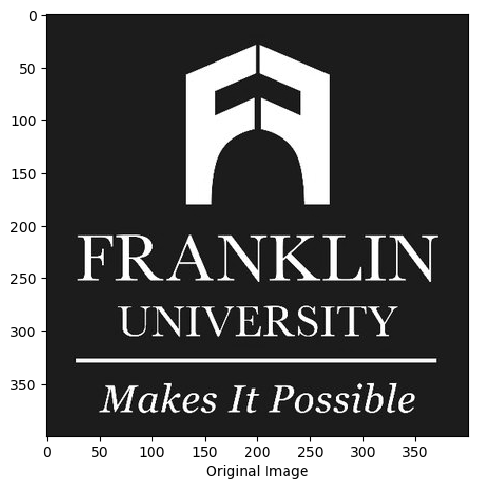

In [23]:
#import the Franklin University logo provided
from skimage import data, io, color
from pylab import *
img = io.imread("https://github.com/franklin-univ-data-science/data/blob/master/images/Franklin_logo.jpg?raw=true", as_gray=True)

#print the Franklin University logo
io.imshow(img)
xlabel('Original Image')

#### Apply Principal Component Analysis to determine the number of components which will make the image readable

In [24]:
#import the matplotlib.pyplot library
import matplotlib.pyplot as plt

#create the pca variable and assign with the PCA module
##assign the n_components parameter with the value of None to return all components
#call the fit_transform function on the pca variable and pass in the img matrix
pca = PCA(n_components=None)
X_pca = pca.fit_transform(img)

#### Plot the Explained Variance from the Principal Component Analysis

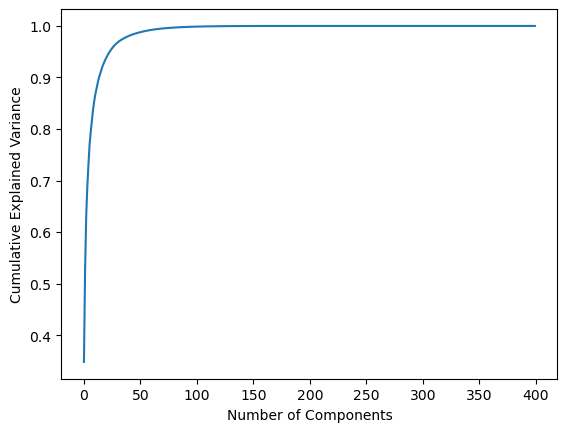

In [25]:
#call the plot function from the matplotlib library
#using the numpy function cumsum, plot the calculated cumulative sum of the explained variance ratio
#assign the x-axis label with 'Number of Components'
#assign the y-axis label with 'Cumulative Explained Variance'
#use the show function to show the plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### Apply Principal Component Analysis Model to the Image

In [26]:
#from the plot above we can see the number of components platueas at about 50
#based on trial and error the image remains clear at 20 components
#create the variable image_pca variable and assign with the PCA module
##assign the n_components parameter with the value of 20
#call the fit_transform function on the pca variable and pass in the img matrix
#create the variable X_inverse and assign with the values of the newly created feature subspace
##use the inverse_transform function to project the feature subspace in a readable format
image_pca = PCA(n_components=20)
X = image_pca.fit_transform(img)
X_inverse = image_pca.inverse_transform(X)

#### Print the Compressed Image

Text(0.5, 1.0, 'PCA Image')

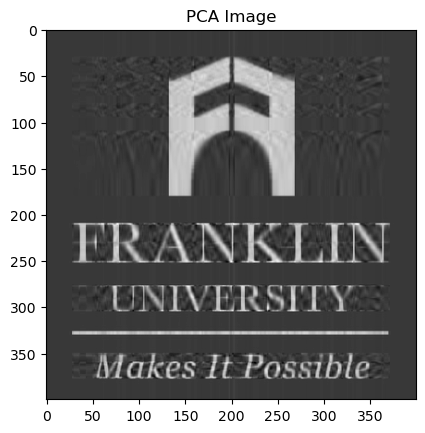

In [27]:
plt.imshow(X_inverse, cmap='gray')
plt.title('PCA Image')